# Metody Obliczeniowe w Nauce i Technice
# Laboratorium 8: Page Rank
## Przemysław Roman

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time
import networkx as nx

def time_exec(func, *args):
    start_time = time.time()
    result = func(*args)
    return result, time.time() - start_time

## Zadanie 1

In [25]:
def preprocessing(A, n):
    A = np.reshape(A, (n, n), order='C')
    for v in range(n):
        A[v] *= 1/sum(A[v])
    return A.T

def power_iterations(A, max_iter=10**3, eps=1e-7):
    x_i = np.random.rand(A.shape[1])
    i = 0
    while True:
        x_j = np.dot(A, x_i)
        norm = np.linalg.norm(x_j, np.inf)
        x_j_norm = x_j / norm
        i += 1
        if i >= max_iter or np.linalg.norm(x_j_norm - x_i, np.inf) < eps:
            x_i = x_j_norm
            return np.linalg.norm(x_j, np.inf), x_i/np.linalg.norm(x_i)
        x_i = x_j_norm

def arr_to_graph(A):
    return nx.from_numpy_array(A, parallel_edges=True, create_using=nx.DiGraph)

def display_graph(G):
    nx.draw(G, with_labels=True, font_weight='bold')

def page_rank(A, n):
    A = preprocessing(np.copy(A), n)
    G = arr_to_graph(A)
    display_graph(G)
    return power_iterations(A)

my_sol: 0.3315473495669439, nx_sol: 0.10256734819155826
my_sol: 0.24866053137412553, nx_sol: 0.08166698871453906
my_sol: 0.16577370374038905, nx_sol: 0.06017853109942323
my_sol: 0.2762894711965733, nx_sol: 0.09331759360756377
my_sol: 0.38680526025362516, nx_sol: 0.11400895981051962
my_sol: 0.08288683707310483, nx_sol: 0.03807541867558638
my_sol: 0.1657736943010207, nx_sol: 0.056091570038952696
my_sol: 0.13814475154402098, nx_sol: 0.052160601625108244
my_sol: 0.33154737788659844, nx_sol: 0.10596325370562718
my_sol: 0.5802079394921659, nx_sol: 0.17338920467297084
my_sol: 0.1934026362078205, nx_sol: 0.06162680470753881
my_sol: 0.19340263348620598, nx_sol: 0.060953725150611746


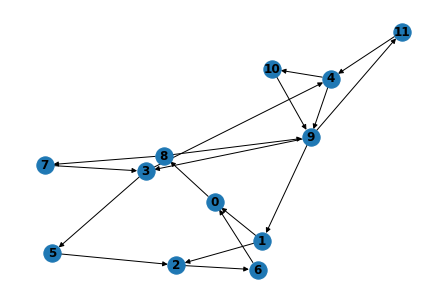

In [26]:
n = 12
A = np.array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
], dtype=float)

my_sol = page_rank(A, n)[1]
nx_sol = nx.pagerank(arr_to_graph(np.reshape(A, (n, n), order='C')))

for v in range(n):
    print(f'my_sol: {my_sol[v]}, nx_sol: {nx_sol[v]}')